## Notebook contents
* [1. Load the required packages](#section1)
* [2. Load the data and make initial checks](#section2)
* [3. The "Standardised" dataset for the period of interest (2018)](#section3)
* [4. The "Gendered Raw" dataset for the period of interest (2018)](#section4)
* [5. The "Total Raw" dataset for the period of interest (2018)](#section5)
* [6. Conduct PCA on Total Raw](#section6) 






## 1. Load the required packages<a class="anchor" id="section1"></a>

In [1]:
# Required packages
import pandas as pd
import numpy as np
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plot
import seaborn as sns


## 2. Load the data and make initial checks<a class="anchor" id="section2"></a>

### 2.1. Read the data, make a copy, check types and check for null and NA values

In [2]:
# Read in data from csv file to pandas dataframe
data_set = pd.read_csv("childhood_obesity_data.csv")

In [3]:
# Make a copy of the data to work from to preserve original dataset in case it's needed for reference
data = data_set.copy(deep = True)

In [4]:
# Check that the data set is of the expected size
# Check that columns are of the expected data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [5]:
# Check for non-unique local authority names as this column will serve as identifier
# Count and duplicates in the "local_authority_area" column
# If total returned is 0, proceed. If not, investigate further

data["local_authority_area"].duplicated().sum()

0

In [6]:
# Same logic to check for null values
data.isnull().any().sum()

0

In [7]:
# Same logic to check for na values
data.isna().any().sum()

0

### 2.2. Sense check the data

In [8]:
# Apply some sense checks to the data
# For each row of the dataframe:
# Does total cases = male cases + female cases across each of the years?
# Does total population = male population + female population across each of the years?
# Does total budget = sum of spending on each of the 6 spending categories? 


In [9]:
# Create a function to test all anomalies 

def test_empty(test):
    if not test.empty:
        print(f"{test}")
    else:
        print(f"No anomalies")

In [10]:
# Does total cases = male cases + female cases across each of the years?
 
cases_anomaly_2008 = data[data["2008_cases_total"] != data["2008_cases_male"] + data["2008_cases_female"]]
cases_anomaly_2013 = data[data["2013_cases_total"] != data["2013_cases_male"] + data["2013_cases_female"]]
cases_anomaly_2018 = data[data["2018_cases_total"] != data["2018_cases_male"] + data["2018_cases_female"]]

test_empty(cases_anomaly_2008) 
test_empty(cases_anomaly_2013)
test_empty(cases_anomaly_2018)

No anomalies
No anomalies
No anomalies


In [11]:
# Does total population = male population + female population across each of the years?

popn_anomaly_2008 = data[data["2008_pop_total"] != data["2008_pop_male"] + data["2008_pop_female"]]
popn_anomaly_2013 = data[data["2013_pop_total"] != data["2013_pop_male"] + data["2013_pop_female"]]
popn_anomaly_2018 = data[data["2018_pop_total"] != data["2018_pop_male"] + data["2018_pop_female"]]

test_empty(popn_anomaly_2008) 
test_empty(popn_anomaly_2013)
test_empty(popn_anomaly_2018)

No anomalies
No anomalies
No anomalies


In [12]:
# Does total budget = sum of spending on each of the 6 spending categories?

spend_anomaly = data[data["total_budget"] != 
                     data["clean_air"] + 
                     data["clean_environ"] + 
                     data["health_training"] +
                     data["school_awareness"] +
                     data["media_awareness"] +
                     data["sub_counselling"]]

test_empty(spend_anomaly)

No anomalies


## 3. The "Standardised" dataset for the period of interest (2018)<a class="anchor" id="section3"></a>

### 3.1. Calculate incidence rates and spend per capita (scaled per 100k of the population)

In [13]:
# For 2018, calculate the following for each local authority area as new columns in the dataframe:
# cases per 100,000 of the total population 
# cases per 100,000 of the male population and the same for female
# spend per 100,000 of the population for each of the 6 spending categories

scale_factor = 100000

# 2018 incidence rate per 100k for total population
data["2018_incidence_total"] = data["2018_cases_total"] / data["2018_pop_total"] * scale_factor

# 2018 incidence rate per 100k for males
data["2018_incidence_male"] = data["2018_cases_male"] / data["2018_pop_male"] * scale_factor

# 2018 incidence rate per 100k for females
data["2018_incidence_female"] = data["2018_cases_female"] / data["2018_pop_female"] * scale_factor


# 2018 spend per 100k of the population for each spending category
data["2018_clean_air_scaled"] = data["clean_air"] / data["2018_pop_total"] * scale_factor
data["2018_clean_environ_scaled"] = data["clean_environ"] / data["2018_pop_total"] * scale_factor
data["2018_health_training_scaled"] = data["health_training"] / data["2018_pop_total"] * scale_factor
data["2018_school_awareness_scaled"] = data["school_awareness"] / data["2018_pop_total"] * scale_factor
data["2018_media_awareness_scaled"] = data["media_awareness"] / data["2018_pop_total"] * scale_factor
data["2018_sub_counselling_scaled"] = data["sub_counselling"] / data["2018_pop_total"] * scale_factor

### 3.2. Create the Standardised subset of the dataframe

In [14]:
# Make a new dataframe consisting of a subset of the data in order to conduct the principal component analysis
# Drop all columns "2008_cases_total" to "sub_counselling" inclusive
# Also drop "2018_incidence_total as we will use incidence by gender for the PCA
# Decided to do it this way rather than dropping columns in place in case data turns out to be unsuitable for PCA
# Previous form of the data can then be returned to easily

#ran drop twice as could not work out how to drop both a column range and a single column 
data_pca = data.drop(data.loc[:, "2008_cases_total":"sub_counselling"].columns, axis = 1)
data_pca = data_pca.drop(["2018_incidence_total"], axis = 1)

In [15]:
# Check that we obtain the expected dataframe 
data_pca

,local_authority_area,region,local_authority_type,2018_incidence_male,2018_incidence_female,2018_clean_air_scaled,2018_clean_environ_scaled,2018_health_training_scaled,2018_school_awareness_scaled,2018_media_awareness_scaled,2018_sub_counselling_scaled
0,Barking and Dagenham,London,london_borough,294.936076,513.507264,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460
1,Barnet,London,london_borough,180.504299,247.700658,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082
2,Barnsley,Yorkshire and the Humber,metropolitan_borough,166.856873,240.774146,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495
3,Bath and North East Somerset,South West,unitary_authority,171.636044,343.342408,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080
4,Bedford,East of England,unitary_authority,188.841410,240.171193,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403
...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,North West,metropolitan_borough,658.637224,1078.216479,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144
148,Wokingham,South East,unitary_authority,83.253600,118.315741,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854
149,Wolverhampton,West Midlands,metropolitan_borough,398.596810,879.064607,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359
150,Worcestershire,West Midlands,non_metropolitan_county,377.582157,639.386591,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552


### 3.3. Use descriptive statistics and plots to inspect Standardised 


In [16]:
# Run descriptive statistics on the data_pca subset
numeric_cols = data_pca.select_dtypes(exclude = ["object"])
pd.set_option('display.float_format',  '{:,.2f}'.format)
numeric_cols.describe()

,2018_incidence_male,2018_incidence_female,2018_clean_air_scaled,2018_clean_environ_scaled,2018_health_training_scaled,2018_school_awareness_scaled,2018_media_awareness_scaled,2018_sub_counselling_scaled
count,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,247.00,434.57,"17,076.44","19,303.98","7,532.69","19,488.72","9,193.26","5,912.82"
std,98.75,183.94,"12,675.35","10,672.46","6,336.08","20,316.66","4,275.83","2,623.43"
min,68.24,118.32,0.00,0.00,0.00,430.84,0.00,0.00
25%,181.17,303.53,"12,056.89","13,041.21","4,677.81","13,052.72","5,968.99","3,874.65"
50%,232.86,396.12,"16,276.75","19,392.04","7,371.95","17,224.97","9,270.20","5,754.29"
75%,292.17,513.73,"20,115.53","23,773.14","8,937.34","21,753.55","11,809.85","7,309.24"
max,658.64,"1,078.22","148,020.23","111,015.17","74,010.11","246,700.38","24,670.04","18,456.22"


In [17]:
# Visually inspect spread of data using boxplots to graph:
# (a) Range of incidence rates by gender
# (b) Range of spend per capita by each of the 6 different areas 
# Graph as two separate groups due to differing scales between incidence rates and spend per capita

Text(0, 0.5, 'Obesity Incidence per 100k of Popn.')

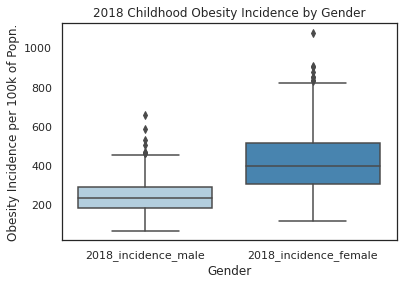

In [18]:
# Boxplots of incidence rates by gender

sns.set(style = "white")
gender_boxplot = sns.boxplot(data = data_pca.loc[:, ["2018_incidence_male", "2018_incidence_female"]],
                             palette = "Blues")
gender_boxplot.axes.set_title("2018 Childhood Obesity Incidence by Gender", fontsize=12)
gender_boxplot.set_xlabel("Gender", fontsize=12)
gender_boxplot.set_ylabel("Obesity Incidence per 100k of Popn.", fontsize=12)

Text(0, 0.5, 'Spending Category')

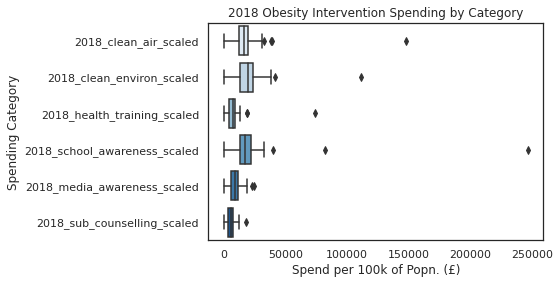

In [19]:
# Boxplots of spend per capita by spending category

sns.set(style = "white")
spending_boxplot = sns.boxplot(data = data_pca.loc[:, "2018_clean_air_scaled" : "2018_sub_counselling_scaled"], 
                               orient = "h",
                               palette = "Blues")
spending_boxplot.axes.set_title("2018 Obesity Intervention Spending by Category", fontsize=12)
spending_boxplot.set_xlabel("Spend per 100k of Popn. (£)", fontsize=12)
spending_boxplot.set_ylabel("Spending Category", fontsize=12)

### 3.4. Test for and remove outliers in Standardised dataset

### 3.4.1. Define Tukey fences function

In [20]:
# Use Tukey fences to identify potential outliers

# Function takes a dataframe, identifier column and column containing variable of interest
# Function returns elements of a dataframe falling outside of (a) Tukey loswer and (b) Tukey upper fences

def tukey_fences(data_set, identifier, variable):
    Q1 = data_set[variable].quantile(0.25)
    Q3 = data_set[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_inner_fence = Q1 - IQR * 1.5
    lower_outer_fence = Q1 - IQR * 3
    upper_inner_fence = Q3 + IQR * 1.5
    upper_outer_fence = Q3 + IQR * 3
    lower_inner_list = data_set[[identifier, variable]][data_set[variable] < lower_inner_fence]
    lower_outer_list = data_set[[identifier, variable]][data_set[variable] < lower_outer_fence]
    upper_inner_list = data_set[[identifier, variable]][data_set[variable] > upper_inner_fence]
    upper_outer_list = data_set[[identifier, variable]][data_set[variable] > upper_outer_fence]
    
    return lower_inner_list, lower_outer_list, upper_inner_list, upper_outer_list


### 3.4.2. Use the tukey_fences function on each numeric variable:

#### 3.4.2.1. Male Incidence

In [21]:
tukey_fences(data_pca, "local_authority_area", "2018_incidence_male")

(Empty DataFrame
 Columns: [local_authority_area, 2018_incidence_male]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_incidence_male]
 Index: [],
     local_authority_area  2018_incidence_male
 10           Bournemouth               464.02
 91            Nottingham               465.41
 92       Nottinghamshire               463.89
 106              Salford               503.58
 111               Slough               470.72
 144                Wigan               585.62
 147               Wirral               658.64
 151                 York               531.74,
     local_authority_area  2018_incidence_male
 147               Wirral               658.64)

#### 3.4.2.2. Female Incidence

In [22]:
tukey_fences(data_pca, "local_authority_area", "2018_incidence_female")

(Empty DataFrame
 Columns: [local_authority_area, 2018_incidence_female]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_incidence_female]
 Index: [],
       local_authority_area  2018_incidence_female
 7    Blackburn with Darwen                 909.13
 36                  Dudley                 834.98
 91              Nottingham                 904.80
 92         Nottinghamshire                 852.98
 106                Salford                 853.02
 144                  Wigan                 831.32
 147                 Wirral               1,078.22
 149          Wolverhampton                 879.06,
 Empty DataFrame
 Columns: [local_authority_area, 2018_incidence_female]
 Index: [])

#### 3.4.2.3. Clean Air

In [23]:
tukey_fences(data_pca, "local_authority_area", "2018_clean_air_scaled")

(Empty DataFrame
 Columns: [local_authority_area, 2018_clean_air_scaled]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_clean_air_scaled]
 Index: [],
     local_authority_area  2018_clean_air_scaled
 25        City of London             148,020.23
 52            Hartlepool              38,481.14
 76            Manchester              32,629.07
 105              Rutland              39,579.07,
    local_authority_area  2018_clean_air_scaled
 25       City of London             148,020.23)

#### 3.4.2.4. Clean Environment

In [24]:
tukey_fences(data_pca, "local_authority_area", "2018_clean_environ_scaled")

(Empty DataFrame
 Columns: [local_authority_area, 2018_clean_environ_scaled]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_clean_environ_scaled]
 Index: [],
    local_authority_area  2018_clean_environ_scaled
 25       City of London                 111,015.17
 67              Lambeth                  41,915.90,
    local_authority_area  2018_clean_environ_scaled
 25       City of London                 111,015.17)

#### 3.4.2.5. Health Training

In [25]:
tukey_fences(data_pca, "local_authority_area", "2018_health_training_scaled")

(Empty DataFrame
 Columns: [local_authority_area, 2018_health_training_scaled]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_health_training_scaled]
 Index: [],
     local_authority_area  2018_health_training_scaled
 25        City of London                    74,010.11
 105              Rutland                    18,625.44
 131             Thurrock                    19,176.40,
    local_authority_area  2018_health_training_scaled
 25       City of London                    74,010.11)

#### 3.4.2.6. School Awareness

In [26]:
tukey_fences(data_pca, "local_authority_area", "2018_school_awareness_scaled")

(Empty DataFrame
 Columns: [local_authority_area, 2018_school_awareness_scaled]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_school_awareness_scaled]
 Index: [],
    local_authority_area  2018_school_awareness_scaled
 25       City of London                    246,700.38
 59      Isles of Scilly                     81,967.21
 81  Newcastle upon Tyne                     39,955.62,
    local_authority_area  2018_school_awareness_scaled
 25       City of London                    246,700.38
 59      Isles of Scilly                     81,967.21)

#### 3.4.2.7. Media Awareness

In [27]:
tukey_fences(data_pca, "local_authority_area", "2018_media_awareness_scaled")

(Empty DataFrame
 Columns: [local_authority_area, 2018_media_awareness_scaled]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_media_awareness_scaled]
 Index: [],
    local_authority_area  2018_media_awareness_scaled
 25       City of London                    24,670.04
 50             Haringey                    22,976.82,
 Empty DataFrame
 Columns: [local_authority_area, 2018_media_awareness_scaled]
 Index: [])

#### 3.4.2.8. Subsidised Counselling

In [28]:
tukey_fences(data_pca, "local_authority_area", "2018_sub_counselling_scaled")

(Empty DataFrame
 Columns: [local_authority_area, 2018_sub_counselling_scaled]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_sub_counselling_scaled]
 Index: [],
     local_authority_area  2018_sub_counselling_scaled
 111               Slough                    18,456.22,
     local_authority_area  2018_sub_counselling_scaled
 111               Slough                    18,456.22)

### 3.4.3 Remove outliers

In [29]:
# Drop rows for "City of London" and "Isles of Scilly" before proceeding with PCA analysis

rows_to_drop = data_pca[
    (data_pca["local_authority_area"] == "City of London") | 
    ((data_pca["local_authority_area"] == "Isles of Scilly"))].index

data_pca.drop(rows_to_drop, inplace = True)

In [30]:
# Check that it worked
dropped = ["City of London", "Isles of Scilly"]

for d in dropped:
    print(d in data_pca["local_authority_area"].values)


False
False


<AxesSubplot:>

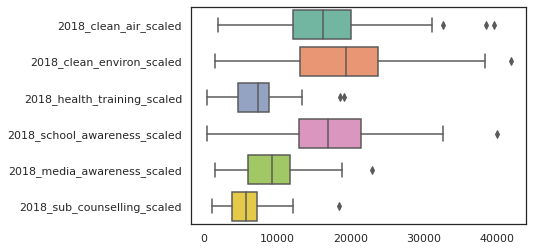

In [31]:
# Examine boxplots of per capita spending with outliers removed
sns.set(style = "white")
sns.boxplot(data = data_pca.loc[:, "2018_clean_air_scaled" : "2018_sub_counselling_scaled"], 
            orient = "h",
            palette = "Set2")

### 3.5. Test the suitability of Standardised for PCA

### 3.5.1. Produce the correlation matrix and heatmap for Standardised

In [32]:
# Opted for correlation matrix over covariance matrix as data is on different scales: obesity incidence vs spend per capita
# No standardisation of variables required beforehand as computing correlation matrix will take care of this 

In [33]:
# Create a dictionary for use in labelling plots:

labels = {"2018_incidence_male" : "M",
          "2018_incidence_female" : "F",
          "2018_clean_air_scaled" : "Air",
          "2018_clean_environ_scaled" : "Env",
          "2018_health_training_scaled" : "Hth",
          "2018_school_awareness_scaled" : "Sch",
          "2018_media_awareness_scaled" : "Med",
          "2018_sub_counselling_scaled" : "Cns",
          }

values = labels.values()

In [34]:
data_pca_numeric = data_pca.loc[:, "2018_incidence_male" : "2018_sub_counselling_scaled"]

In [35]:
corr_matrix = data_pca_numeric.corr()

In [36]:
corr_matrix

,2018_incidence_male,2018_incidence_female,2018_clean_air_scaled,2018_clean_environ_scaled,2018_health_training_scaled,2018_school_awareness_scaled,2018_media_awareness_scaled,2018_sub_counselling_scaled
2018_incidence_male,1.00,0.85,-0.06,-0.14,-0.06,0.03,0.13,0.05
2018_incidence_female,0.85,1.00,-0.08,-0.09,-0.04,-0.02,0.08,0.07
2018_clean_air_scaled,-0.06,-0.08,1.00,-0.18,-0.00,-0.14,-0.16,-0.08
2018_clean_environ_scaled,-0.14,-0.09,-0.18,1.00,-0.04,-0.39,-0.13,-0.11
2018_health_training_scaled,-0.06,-0.04,-0.00,-0.04,1.00,0.05,-0.04,0.05
2018_school_awareness_scaled,0.03,-0.02,-0.14,-0.39,0.05,1.00,0.01,0.10
2018_media_awareness_scaled,0.13,0.08,-0.16,-0.13,-0.04,0.01,1.00,0.12
2018_sub_counselling_scaled,0.05,0.07,-0.08,-0.11,0.05,0.10,0.12,1.00


Text(0.5, 1.0, 'Standardised: Triangle Correlation Heatmap')

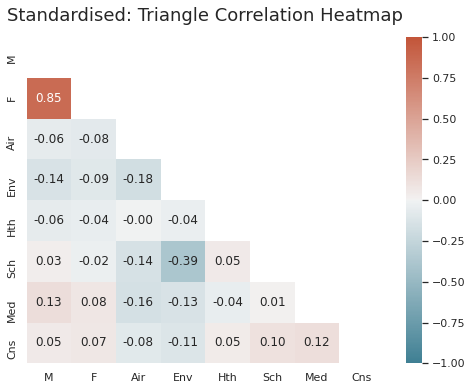

In [37]:
# Use Seaborn to produce diagonal correlation heatmap
# I find the diagonal ones easier to focus on 
# Tried a custom diverging colour palette to de-emphasise low correlation pairs

plot.figure(figsize = (8, 6))

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

corr_heatmap = sns.heatmap(corr_matrix, 
                           mask = mask, 
                           vmin = -1, 
                           vmax = 1,
                           annot = True,
                           fmt = ".2f",
                           cmap = custom_palette,
                           xticklabels = values,
                           yticklabels = values,
                           )

corr_heatmap.set_title("Standardised: Triangle Correlation Heatmap",
                       fontdict = {"fontsize" : 18},
                       pad = 16)

### 3.5.2. Test for positivity of the correlation matrix

In [38]:
# Test that the determinant of the correlation matrix is +ve
# This allows variance to be extracted 

det_corr_matrix = np.linalg.det(corr_matrix)
print(f"The determinant of the correlation matrix to 2dp is: {det_corr_matrix:.2f}")

The determinant of the correlation matrix to 2dp is: 0.18


### 3.5.3. Perform Bartlett's Test of Sphericity

In [39]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(data_pca_numeric)

print(f"The Chi-Square statistic to 2dp is: {chi_square_value:.2f}")
print(f"The p-value to 2dp is: {p_value:.2f}")


The Chi-Square statistic to 2dp is: 256.44
The p-value to 2dp is: 0.00


### 3.5.4. Calculate Kaiser-Meyer-Olkin (KMO) value

In [40]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_pca_numeric)

print(f"The KMO value to 2dp is: {kmo_model:.2f}")


The KMO value to 2dp is: 0.47


### 3.5.5. Conclusion from Testing

In [41]:
# Standardised dataset looks to be unsuitable for PCA based on:
# Low pairwise correlations as evidenced by heatmap
# Low KMO value below the minimum recommended threshold of 0.6

## 4. The "Gendered Raw" dataset for the period of interest (2018)<a class="anchor" id="section4"></a>

### 4.1. Create the "Gendered Raw" subset of the data

In [42]:
# create unscaled dataset with same layout as for Standardised but with raw counts

data_pca_unscaled = data.copy(deep = True)
data_pca_unscaled.insert(1, "region", data_pca_unscaled.pop("region"))
data_pca_unscaled.insert(2, "local_authority_type", data_pca_unscaled.pop("local_authority_type"))
data_pca_unscaled = data_pca_unscaled.drop(data_pca_unscaled.loc[:, "2008_cases_total":"2013_cases_male"].columns, axis = 1)
data_pca_unscaled = data_pca_unscaled.drop(data_pca_unscaled.loc[:, "2008_pop_male":"2013_cases_female"].columns, axis = 1)
data_pca_unscaled = data_pca_unscaled.drop(data_pca_unscaled.loc[:, "2008_pop_female":"total_budget"].columns, axis = 1)
data_pca_unscaled = data_pca_unscaled.drop(data_pca_unscaled.loc[:, "2018_incidence_total":"2018_sub_counselling_scaled"].columns, axis = 1)

In [43]:
# Check that the Gendered Raw dataframe has the expected shape
data_pca_unscaled

,local_authority_area,region,local_authority_type,2018_cases_male,2018_cases_female,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,Barking and Dagenham,London,london_borough,230,533,21000,22000,18000,41000,18000,19000
1,Barnet,London,london_borough,292,481,50000,17000,23000,74000,30000,26000
2,Barnsley,Yorkshire and the Humber,metropolitan_borough,212,315,41000,45000,5000,26000,29000,14000
3,Bath and North East Somerset,South West,unitary_authority,156,338,33000,42000,19000,50000,10000,7000
4,Bedford,East of England,unitary_authority,156,211,37000,52000,17000,8000,3000,13000
...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,North West,metropolitan_borough,1103,1884,69000,47000,30000,41000,14000,8000
148,Wokingham,South East,unitary_authority,67,102,20000,41000,13000,19000,10000,6000
149,Wolverhampton,West Midlands,metropolitan_borough,492,1236,18000,27000,23000,55000,50000,28000
150,Worcestershire,West Midlands,non_metropolitan_county,1204,2033,128000,112000,57000,76000,67000,30000


### 4.2. Try using the tukey_fences function to detect outliers in the unscaled data

#### 4.2.1 Male counts

In [44]:
tukey_fences(data_pca_unscaled, "local_authority_area", "2018_cases_male")

(Empty DataFrame
 Columns: [local_authority_area, 2018_cases_male]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_cases_male]
 Index: [],
     local_authority_area  2018_cases_male
 26              Cornwall             1187
 32            Derbyshire             1345
 42                 Essex             1244
 49             Hampshire             1256
 55         Hertfordshire             1343
 62                  Kent             1621
 68            Lancashire             1907
 83               Norfolk             1093
 89      Northamptonshire             1213
 92       Nottinghamshire             2000
 120        Staffordshire             1668
 147               Wirral             1103
 150       Worcestershire             1204,
     local_authority_area  2018_cases_male
 68            Lancashire             1907
 92       Nottinghamshire             2000
 120        Staffordshire             1668)

#### 4.2.2. Female counts

In [45]:
tukey_fences(data_pca_unscaled, "local_authority_area", "2018_cases_female")

(Empty DataFrame
 Columns: [local_authority_area, 2018_cases_female]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, 2018_cases_female]
 Index: [],
     local_authority_area  2018_cases_female
 6             Birmingham               3057
 26              Cornwall               2370
 32            Derbyshire               2877
 49             Hampshire               2280
 55         Hertfordshire               2527
 62                  Kent               2442
 68            Lancashire               3125
 89      Northamptonshire               2288
 92       Nottinghamshire               3745
 120        Staffordshire               3094,
     local_authority_area  2018_cases_female
 6             Birmingham               3057
 68            Lancashire               3125
 92       Nottinghamshire               3745
 120        Staffordshire               3094)

#### 4.2.3. Clean Air

In [46]:
tukey_fences(data_pca_unscaled, "local_authority_area", "clean_air")

(Empty DataFrame
 Columns: [local_authority_area, clean_air]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, clean_air]
 Index: [],
     local_authority_area  clean_air
 20        Cambridgeshire     149000
 26              Cornwall     139000
 32            Derbyshire     157000
 42                 Essex     297000
 49             Hampshire     187000
 55         Hertfordshire     239000
 62                  Kent     278000
 68            Lancashire     180000
 76            Manchester     149000
 83               Norfolk     142000
 89      Northamptonshire     234000
 120        Staffordshire     158000
 124              Suffolk     167000
 126               Surrey     219000
 142          West Sussex     175000,
     local_authority_area  clean_air
 42                 Essex     297000
 55         Hertfordshire     239000
 62                  Kent     278000
 89      Northamptonshire     234000
 126               Surrey     219000)

#### 4.2.4.Clean Environment

In [47]:
tukey_fences(data_pca_unscaled, "local_authority_area", "clean_environ")

(Empty DataFrame
 Columns: [local_authority_area, clean_environ]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, clean_environ]
 Index: [],
     local_authority_area  clean_environ
 6             Birmingham         272000
 17       Buckinghamshire         154000
 42                 Essex         270000
 49             Hampshire         253000
 55         Hertfordshire         246000
 62                  Kent         333000
 68            Lancashire         292000
 69                 Leeds         172000
 94           Oxfordshire         254000
 120        Staffordshire         173000
 126               Surrey         254000
 142          West Sussex         227000
 145            Wiltshire         158000,
     local_authority_area  clean_environ
 6             Birmingham         272000
 42                 Essex         270000
 49             Hampshire         253000
 55         Hertfordshire         246000
 62                  Kent         333000
 68            Lancashire

#### 4.2.5. Health Training

In [48]:
tukey_fences(data_pca_unscaled, "local_authority_area", "health_training")

(Empty DataFrame
 Columns: [local_authority_area, health_training]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, health_training]
 Index: [],
     local_authority_area  health_training
 6             Birmingham           130000
 17       Buckinghamshire            61000
 20        Cambridgeshire            84000
 29               Cumbria            54000
 33                 Devon            88000
 40           East Sussex            54000
 49             Hampshire           122000
 55         Hertfordshire           102000
 62                  Kent            84000
 65              Kirklees            51000
 71        Leicestershire            67000
 76            Manchester            55000
 83               Norfolk            98000
 89      Northamptonshire            87000
 92       Nottinghamshire            70000
 94           Oxfordshire            61000
 126               Surrey            49000
 140         Warwickshire            53000
 142          West Sussex

#### 4.2.6. School Awareness

In [49]:
tukey_fences(data_pca_unscaled, "local_authority_area", "school_awareness")

(Empty DataFrame
 Columns: [local_authority_area, school_awareness]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, school_awareness]
 Index: [],
     local_authority_area  school_awareness
 20        Cambridgeshire            214000
 32            Derbyshire            134000
 33                 Devon            178000
 37                Durham            130000
 42                 Essex            284000
 44       Gloucestershire            139000
 49             Hampshire            266000
 55         Hertfordshire            180000
 62                  Kent            291000
 68            Lancashire            163000
 69                 Leeds            163000
 71        Leicestershire            139000
 73          Lincolnshire            151000
 92       Nottinghamshire            166000
 124              Suffolk            142000
 126               Surrey            340000,
     local_authority_area  school_awareness
 20        Cambridgeshire            214000
 42

#### 4.2.7. Media Awareness

In [50]:
tukey_fences(data_pca_unscaled, "local_authority_area", "media_awareness")

(Empty DataFrame
 Columns: [local_authority_area, media_awareness]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, media_awareness]
 Index: [],
     local_authority_area  media_awareness
 6             Birmingham           140000
 33                 Devon           102000
 40           East Sussex            84000
 44       Gloucestershire           115000
 49             Hampshire           203000
 62                  Kent           121000
 83               Norfolk            87000
 88       North Yorkshire           108000
 94           Oxfordshire           107000
 126               Surrey           103000
 142          West Sussex            95000,
    local_authority_area  media_awareness
 6            Birmingham           140000
 49            Hampshire           203000
 62                 Kent           121000)

#### 4.2.8. Subsidised Counselling

In [51]:
tukey_fences(data_pca_unscaled, "local_authority_area", "sub_counselling")

(Empty DataFrame
 Columns: [local_authority_area, sub_counselling]
 Index: [],
 Empty DataFrame
 Columns: [local_authority_area, sub_counselling]
 Index: [],
     local_authority_area  sub_counselling
 6             Birmingham            99000
 32            Derbyshire            61000
 42                 Essex            97000
 49             Hampshire            89000
 55         Hertfordshire            80000
 62                  Kent            63000
 68            Lancashire            91000
 71        Leicestershire            77000
 88       North Yorkshire            63000
 89      Northamptonshire            85000
 142          West Sussex            71000,
    local_authority_area  sub_counselling
 6            Birmingham            99000
 42                Essex            97000
 49            Hampshire            89000
 68           Lancashire            91000
 89     Northamptonshire            85000)

In [52]:
# Conclusion from trying to use Tukey Fences on unstandardised data:
# It is clear that the spread of the unstandardised data is such that
# attempting to use Tukey Fences does not yield results that can be relied upon
# to be identifying actual outliers 

### 4.3 Test suitability of Gendered Raw for PCA

### 4.3.1. Produce the correlation matrix and heatmap for Gendered Raw

In [53]:
data_pca_unscaled_numeric = data_pca_unscaled.loc[:, "2018_cases_male" : "sub_counselling"]

In [54]:
corr_matrix_unscaled = data_pca_unscaled_numeric.corr()

In [55]:
corr_matrix_unscaled

,2018_cases_male,2018_cases_female,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
2018_cases_male,1.00,0.96,0.78,0.71,0.64,0.66,0.60,0.72
2018_cases_female,0.96,1.00,0.73,0.72,0.68,0.62,0.60,0.73
clean_air,0.78,0.73,1.00,0.72,0.66,0.74,0.60,0.75
clean_environ,0.71,0.72,0.72,1.00,0.64,0.66,0.68,0.74
health_training,0.64,0.68,0.66,0.64,1.00,0.62,0.69,0.72
school_awareness,0.66,0.62,0.74,0.66,0.62,1.00,0.66,0.69
media_awareness,0.60,0.60,0.60,0.68,0.69,0.66,1.00,0.70
sub_counselling,0.72,0.73,0.75,0.74,0.72,0.69,0.70,1.00


Text(0.5, 1.0, 'Gendered Raw: Triangle Correlation Heatmap')

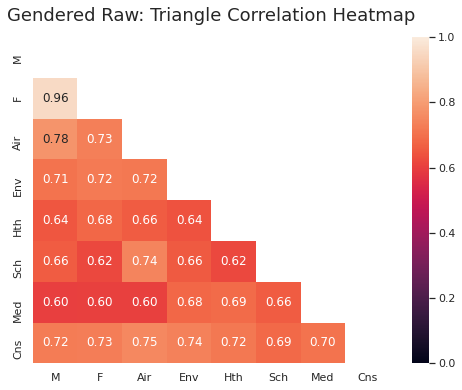

In [56]:
# plot correlation heatmap

plot.figure(figsize = (8, 6))

mask = np.triu(np.ones_like(corr_matrix_unscaled, dtype = bool))

custom_palette = sns.diverging_palette(220, 20, as_cmap=True)

corr_heatmap_unscaled = sns.heatmap(corr_matrix_unscaled, 
                           mask = mask, 
                           vmin = 0, 
                           vmax = 1,
                           annot = True,
                           fmt = ".2f",
                           cmap = "rocket",
                           xticklabels = values,
                           yticklabels = values,
                           )

corr_heatmap_unscaled.set_title("Gendered Raw: Triangle Correlation Heatmap",
                                 fontdict = {"fontsize" : 18},
                                 pad = 16)

### 4.3.2. Test for positivity of the correlation matrix

In [57]:
det_corr_matrix_unscaled = np.linalg.det(corr_matrix_unscaled)
print(f"The determinant of the correlation matrix to 2dp is: {det_corr_matrix_unscaled:.2f}")

The determinant of the correlation matrix to 2dp is: 0.00


In [58]:
# Increase number of decimal places printed as further check on size of determinant
print(f"The determinant of the correlation matrix to 9dp is: {det_corr_matrix_unscaled:.9f}")

The determinant of the correlation matrix to 9dp is: 0.000258096


### 4.3.3. Calculate variance inflation factors for Gendered Raw

In [59]:
# Very small det indicative of multicollinareity
# calculate variance inflation factors to investigate
inv_corr_matrix_unscaled = np.linalg.inv(corr_matrix_unscaled)

In [60]:
np.set_printoptions(precision = 2)
inv_corr_matrix_unscaled

array([[ 14.83, -12.94,  -2.57,   0.58,   1.15,  -0.91,  -0.24,   0.2 ],
       [-12.94,  14.27,   1.4 ,  -1.29,  -1.61,   0.86,   0.26,  -0.77],
       [ -2.57,   1.4 ,   3.96,  -0.67,  -0.47,  -1.05,   0.38,  -0.86],
       [  0.58,  -1.29,  -0.67,   3.02,   0.06,  -0.25,  -0.68,  -0.59],
       [  1.15,  -1.61,  -0.47,   0.06,   2.73,  -0.21,  -0.8 ,  -0.59],
       [ -0.91,   0.86,  -1.05,  -0.25,  -0.21,   2.77,  -0.64,  -0.29],
       [ -0.24,   0.26,   0.38,  -0.68,  -0.8 ,  -0.64,   2.66,  -0.66],
       [  0.2 ,  -0.77,  -0.86,  -0.59,  -0.59,  -0.29,  -0.66,   3.58]])

In [61]:
# Conclusion after inspecting VIF:
# Consider creating another datatset with M and F replaced by total cases as M and F highly collinear

### 4.3.4. Perform Bartlett's Test of Sphericity

In [62]:
chi_square_value_unscaled,p_value_unscaled = calculate_bartlett_sphericity(data_pca_unscaled_numeric)

print(f"The Chi-Square statistic to 2dp is: {chi_square_value_unscaled:.2f}")
print(f"The p-value to 2dp is: {p_value_unscaled:.2f}")


The Chi-Square statistic to 2dp is: 1226.46
The p-value to 2dp is: 0.00


### 4.3.5. Calculate Kaiser-Meyer-Olkin (KMO) value

In [63]:
kmo_unscaled,kmo_model_unscaled = calculate_kmo(data_pca_unscaled_numeric)

print(f"The KMO value to 2dp is: {kmo_model_unscaled:.2f}")


The KMO value to 2dp is: 0.89


### 4.3.6. Conclusion from testing

In [64]:
# Gendered Raw looks to be highly suitable for PCA but could possibky be improved
# Test of VIFs shows that M and F are essentially repeating the same info
# Try replacing these variables with just a total count in next iteration of dataset

## 5. The "Total Raw" dataset for the period of interest (2018)<a class="anchor" id="section5"></a>

### 5.1 Create the "Total Raw" subset of the data

In [65]:
# Replace the M and F counts with total counts
total_col_2018 = data["2018_cases_total"]
data_pca_unscaled_totalcount = data_pca_unscaled.copy(deep = True)
data_pca_unscaled_totalcount.insert(3, "2018_cases_total", total_col_2018)
data_pca_unscaled_totalcount = data_pca_unscaled_totalcount.drop(
                                    data_pca_unscaled.loc[:, "2018_cases_male":"2018_cases_female"].
                                    columns, axis = 1
                                    )

In [66]:
data_pca_unscaled_totalcount_numeric = data_pca_unscaled_totalcount.loc[:, "2018_cases_total" : "sub_counselling"]

In [67]:
data_pca_unscaled_totalcount_numeric

,2018_cases_total,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,763,21000,22000,18000,41000,18000,19000
1,773,50000,17000,23000,74000,30000,26000
2,527,41000,45000,5000,26000,29000,14000
3,494,33000,42000,19000,50000,10000,7000
4,367,37000,52000,17000,8000,3000,13000
...,...,...,...,...,...,...,...
147,2987,69000,47000,30000,41000,14000,8000
148,169,20000,41000,13000,19000,10000,6000
149,1728,18000,27000,23000,55000,50000,28000
150,3237,128000,112000,57000,76000,67000,30000


### 5.2. Test the suitability of Total Raw for PCA

### 5.2.1. Produce the correlation matrix and heatmap for Total Raw

In [68]:
corr_matrix_unscaled_totalcount = data_pca_unscaled_totalcount_numeric.corr()

In [69]:
# correlation matrix of unscaled data using total counts of obsesity instead of divided by gender
pd.set_option("display.float_format", "{:,.2f}".format)
corr_matrix_unscaled_totalcount

,2018_cases_total,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
2018_cases_total,1.00,0.76,0.72,0.67,0.64,0.61,0.74
clean_air,0.76,1.00,0.72,0.66,0.74,0.60,0.75
clean_environ,0.72,0.72,1.00,0.64,0.66,0.68,0.74
health_training,0.67,0.66,0.64,1.00,0.62,0.69,0.72
school_awareness,0.64,0.74,0.66,0.62,1.00,0.66,0.69
media_awareness,0.61,0.60,0.68,0.69,0.66,1.00,0.70
sub_counselling,0.74,0.75,0.74,0.72,0.69,0.70,1.00


In [70]:
# create new dictionary in order to map colun names as list of names has now changed

labels_unscaled_total = {
                         "2018_cases_total" : "Cases",
                         "clean_air" : "Air",
                         "clean_environ" : "Env",
                         "health_training" : "Hth",
                         "school_awareness" : "Sch",
                         "media_awareness" : "Med",
                         "sub_counselling" : "Cns",
                          }
values_unscaled_total = labels_unscaled_total.values()

Text(0.5, 1.0, 'Total Raw: Triangle Correlation Heatmap')

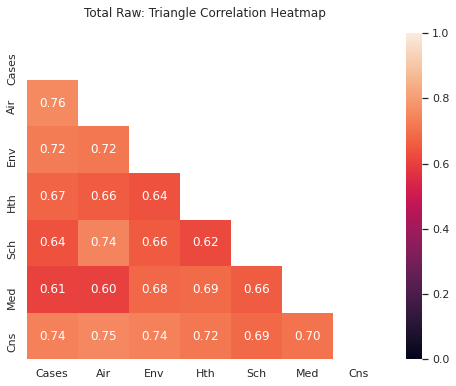

In [71]:
# visualise using correlation heatmap

plot.figure(figsize = (8, 6))

mask = np.triu(np.ones_like(corr_matrix_unscaled_totalcount, dtype = bool))

corr_heatmap_unscaled_totalcount = sns.heatmap(corr_matrix_unscaled_totalcount, 
                                   mask = mask, 
                                   vmin = 0, 
                                   vmax = 1,
                                   annot = True,
                                   fmt = ".2f",
                                   cmap = "rocket",
                                   xticklabels = values_unscaled_total,
                                   yticklabels = values_unscaled_total,
                                   )

corr_heatmap_unscaled_totalcount.set_title("Total Raw: Triangle Correlation Heatmap",
                                           fontdict = {"fontsize" : 12},
                                           pad = 16) 


Text(0.5, 1.0, 'Total Raw: Ordered Correlations Between 2018 Cases and Intervention Spending Category')

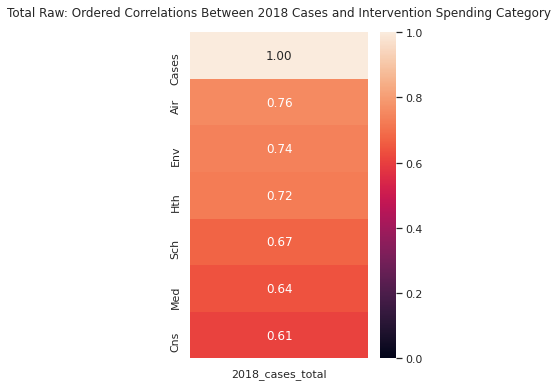

In [72]:
# correlate obesity cases with spending descending order


#dataframe.corr()[['Sale Price']].sort_values(by='Sale Price', ascending=False)
corr_cases_ordered = data_pca_unscaled_totalcount_numeric.corr()[["2018_cases_total"]].sort_values(by = "2018_cases_total", ascending = False)

plot.figure(figsize = (4, 6))

corr_heatmap_cases_ordered = sns.heatmap(corr_cases_ordered, 
                                   vmin = 0, 
                                   vmax = 1,
                                   annot = True,
                                   fmt = ".2f",
                                   cmap = "rocket", 
                                   xticklabels = 1,
                                   yticklabels = values_unscaled_total
                                   )

corr_heatmap_cases_ordered.set_title("Total Raw: Ordered Correlations Between 2018 Cases and Intervention Spending Category",
                                     fontdict = {"fontsize" : 12},
                                     pad = 16) 

### 5.2.2. Check VIFS for Total Raw

In [73]:
# check VIFs to see if these have improved after removing M and F

inv_corr_matrix_unscaled_totalcount = np.linalg.inv(corr_matrix_unscaled_totalcount)
np.set_printoptions(precision = 2)
inv_corr_matrix_unscaled_totalcount


array([[ 3.11e+00, -1.04e+00, -7.47e-01, -5.30e-01, -1.07e-03,  3.28e-02,
        -5.94e-01],
       [-1.04e+00,  3.63e+00, -5.43e-01, -2.63e-01, -1.19e+00,  3.41e-01,
        -7.95e-01],
       [-7.47e-01, -5.43e-01,  2.97e+00, -1.54e-02, -2.02e-01, -6.70e-01,
        -6.10e-01],
       [-5.30e-01, -2.63e-01, -1.54e-02,  2.61e+00, -1.31e-01, -7.78e-01,
        -6.29e-01],
       [-1.07e-03, -1.19e+00, -2.02e-01, -1.31e-01,  2.71e+00, -6.54e-01,
        -2.63e-01],
       [ 3.28e-02,  3.41e-01, -6.70e-01, -7.78e-01, -6.54e-01,  2.65e+00,
        -6.50e-01],
       [-5.94e-01, -7.95e-01, -6.10e-01, -6.29e-01, -2.63e-01, -6.50e-01,
         3.57e+00]])

### 5.2.3. Test for positivity of the correlation matrix

In [74]:
det_corr_matrix_unscaled_totalcount = np.linalg.det(corr_matrix_unscaled_totalcount)
print(f"The determinant of the correlation matrix to 2dp is: {det_corr_matrix_unscaled_totalcount:.2f}")

The determinant of the correlation matrix to 2dp is: 0.00


In [75]:
# Increase number of decimal places printed as further check on size of determinant
print(f"The determinant of the correlation matrix to 9dp is: {det_corr_matrix_unscaled_totalcount:.9f}")

The determinant of the correlation matrix to 9dp is: 0.003661212


### 5.2.4 Perform Bartlett's Test of Sphericity

In [76]:
chi_square_value_totalcount_unscaled,p_value_totalcount_unscaled = calculate_bartlett_sphericity(
                                                                   data_pca_unscaled_totalcount_numeric
                                                                   )

print(f"The Chi-Square statistic to 2dp is: {chi_square_value_totalcount_unscaled:.2f}")
print(f"The p-value to 2dp is: {p_value_totalcount_unscaled:.2f}")

The Chi-Square statistic to 2dp is: 836.17
The p-value to 2dp is: 0.00


### 5.2.5. Calculate Kaiser-Meyer-Olkin (KMO) Value

In [77]:
kmo_all_totalcount,kmo_model_totalcount = calculate_kmo(data_pca_unscaled_totalcount_numeric)

print(f"The KMO value to 2dp is: {kmo_model_totalcount:.2f}")

The KMO value to 2dp is: 0.92


### 5.2.6. Conclusion from testing

In [78]:
# As indicated by improved KMO value, Total Raw looks to be more suitable
# than Gendered Raw for PCA
# There is still evidence of multicollinearity as evidenced by the pairwise correlations > 0.7
# However, extreme multicollinearity has been removed

## 6. Conduct PCA on Total Raw <a class="anchor" id="section6"></a>

### 6.1. Run PCA using functions from the Scikit-learn library

In [79]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data_pca_unscaled_totalcount_numeric)

In [80]:
# Run with the maximum components initially so effects of all components can be inspected
pca = PCA(n_components=7)

principal_components = pca.fit_transform(x)

principal_dataframe = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

### 6.2. Produce scree plot

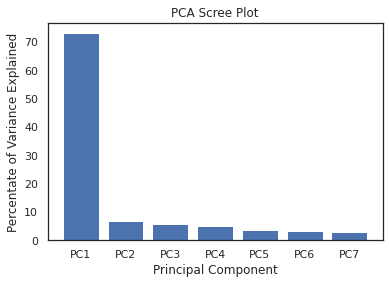

In [81]:
# scree plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
plot.bar(x= range(1,8), height=percent_variance, tick_label=columns)
plot.ylabel('Percentate of Variance Explained')
plot.xlabel('Principal Component')
plot.title('PCA Scree Plot')
plot.show()

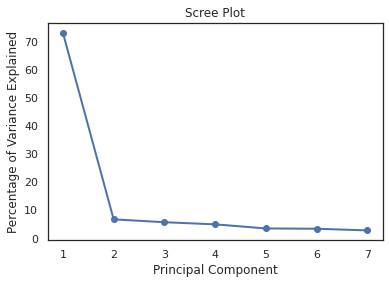

In [82]:
# Trying a line scree plot

PC_values = np.arange(pca.n_components_) + 1
plot.plot(PC_values, pca.explained_variance_ratio_ * 100, 'bo-', linewidth=2)
plot.title('Scree Plot')
plot.xlabel('Principal Component')
plot.ylabel('Percentage of Variance Explained')
plot.show()

### 6.3. Decide on number of components to retain

In [83]:
# Guidelines:
# Keep components with eigenvalues > 1
# Plot scree plot: ordered plot of variance explained by each component arranged in descending order
# Inspect 
# Discard all components falling below point at which slope of the line chages drastically => "the elbow"
# Keep only the components explaining 70% of the data (Jolliffe, 2016)

In [84]:
# Decision on components:
# choose 2 components
# explains ~80% of the variance
# inspecting scree plot suggests "elbow" occurs at component 2
# eigenvalue of PC2 is < 1 but keep as we can explain another c.6% of variance with it